# Wine Quality

### It’s a well-established fact that age makes wine better – the older the wine, the better it will taste. However, age is not the only thing that determines a wine’s taste. Numerous factors determine the wine quality certification, including physicochemical tests such as alcohol quantity, fixed acidity, volatile acidity, density, and pH level, to name a few. 



In [36]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold


In [2]:
df = pd.read_csv("winequalityN.csv")
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Data Processing

In [3]:
df['quality'][df['quality'] < 7] = 0
df['quality'][df['quality'] >= 7] = 1
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,0
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


## Deleting columns which contain nan values

In [4]:
print(df.isna().sum())

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


In [5]:
df['chlorides'][df['chlorides'].isna()].index

Int64Index([98, 747], dtype='int64')

In [6]:
df.drop(df['chlorides'][df['chlorides'].isna()].index, inplace = True, errors = 'ignore') 
df.drop(df['fixed acidity'][df['fixed acidity'].isna()].index, inplace = True, errors = 'ignore') 
df.drop(df['volatile acidity'][df['volatile acidity'].isna()].index, inplace = True, errors = 'ignore') 
df.drop(df['citric acid'][df['citric acid'].isna()].index, inplace = True, errors = 'ignore') 
df.drop(df['residual sugar'][df['residual sugar'].isna()].index, inplace = True, errors = 'ignore') 
df.drop(df['pH'][df['pH'].isna()].index, inplace = True, errors = 'ignore') 
df.drop(df['sulphates'][df['sulphates'].isna()].index, inplace = True, errors = 'ignore') 

In [7]:
print(df.isna().sum())

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## Min - Max scaler

In [8]:
from sklearn.preprocessing import MinMaxScaler
y = df["quality"]
df = df[df.columns.difference(["quality"])]
scaler = MinMaxScaler()
scaler.fit(df[df.columns.difference(['type'])])
df[df.columns.difference(['type'])] = scaler.transform(df[df.columns.difference(['type'])])
df

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,type,volatile acidity
0,0.115942,0.059801,0.216867,0.267785,0.264463,0.152778,0.217054,0.308282,0.129213,0.377880,white,0.126667
1,0.217391,0.066445,0.204819,0.132832,0.206612,0.045139,0.449612,0.015337,0.151685,0.290323,white,0.146667
2,0.304348,0.068106,0.240964,0.154039,0.355372,0.100694,0.418605,0.096626,0.123596,0.209677,white,0.133333
3,0.275362,0.081395,0.192771,0.163678,0.280992,0.159722,0.364341,0.121166,0.101124,0.414747,white,0.100000
4,0.275362,0.081395,0.192771,0.163678,0.280992,0.159722,0.364341,0.121166,0.101124,0.414747,white,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0.217391,0.098007,0.048193,0.181222,0.247934,0.093750,0.542636,0.019939,0.337079,0.073733,red,0.360000
6492,0.362319,0.134551,0.048193,0.150183,0.198347,0.107639,0.565891,0.021472,0.202247,0.087558,red,0.346667
6494,0.434783,0.111296,0.078313,0.166377,0.206612,0.097222,0.542636,0.026074,0.297753,0.078341,red,0.286667
6495,0.318841,0.109635,0.072289,0.161172,0.173554,0.107639,0.658915,0.021472,0.275281,0.087558,red,0.376667


# Train - Validation - Test splitting

In [9]:
from sklearn.model_selection import train_test_split
x_Train, xtest, y_Train, ytest = train_test_split(df, y, test_size = 0.1) 
x_train , xvalidation, y_train, yvalidation = train_test_split(x_Train, y_Train, test_size = 0.2) 
xvalidation

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,type,volatile acidity
420,0.681159,0.034884,0.186747,0.051860,0.264463,0.138889,0.341085,0.032209,0.084270,0.299539,white,0.093333
3327,0.347826,0.044850,0.216867,0.094660,0.165289,0.034722,0.550388,0.010736,0.258427,0.147465,white,0.060000
4654,0.429952,0.064784,0.246988,0.127048,0.181818,0.187500,0.286822,0.156442,0.207865,0.329493,white,0.140000
3663,0.637681,0.041528,0.186747,0.044920,0.223140,0.201389,0.341085,0.010736,0.179775,0.320276,white,0.120000
4958,0.173913,0.116279,0.240964,0.209948,0.413223,0.062500,0.558140,0.024540,0.235955,0.105991,red,0.213333
...,...,...,...,...,...,...,...,...,...,...,...,...
2239,0.217391,0.064784,0.253012,0.198381,0.256198,0.031250,0.465116,0.121166,0.134831,0.324885,white,0.240000
803,0.260870,0.049834,0.186747,0.208984,0.231405,0.156250,0.534884,0.165644,0.123596,0.366359,white,0.086667
2205,0.318841,0.078073,0.204819,0.198381,0.322314,0.118056,0.418605,0.144172,0.213483,0.396313,white,0.206667
848,0.115942,0.058140,0.192771,0.243686,0.404959,0.118056,0.310078,0.196319,0.140449,0.375576,white,0.100000


In [10]:
classNames = y_train.unique()
classNames = np.sort(classNames)
print(classNames)

[0 1]


# Imbalanced or balanced dataset

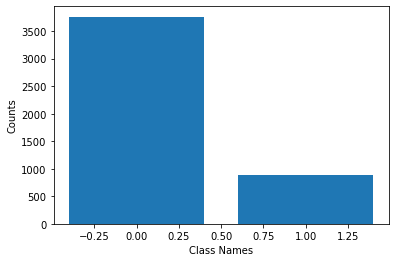

In [12]:
from matplotlib import pyplot as plt
counts = y_train.value_counts()
values = y_train.value_counts().index
plt.bar(values, counts)
plt.xlabel("Class Names")
plt.ylabel("Counts");

##### Our dataset is imbalanced . Let's apply one of resampling techniques.

In [13]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
xtrain, ytrain = ros.fit_sample(x_train, y_train)

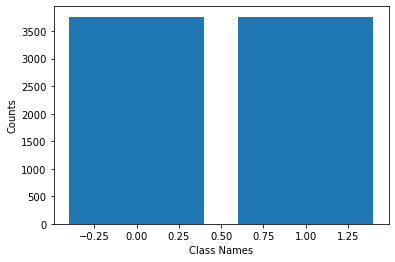

In [14]:
counts = ytrain.value_counts()
values = ytrain.value_counts().index
plt.bar(values, counts)
plt.xlabel("Class Names")
plt.ylabel("Counts");

# Feature selection
## The Columns Correlation

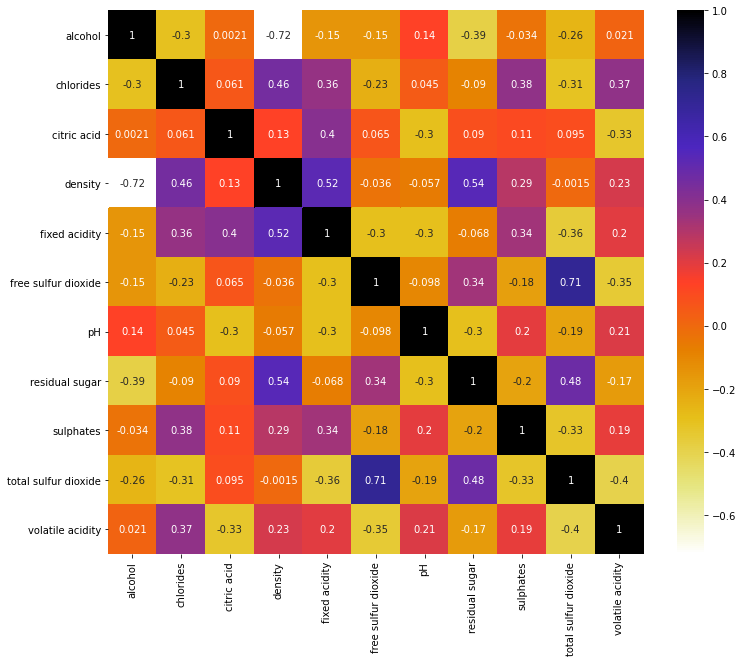

In [15]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = xtrain.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

## The highest correlated features

In [16]:
# This function will find correlated features with given threshold and return one of them 
def correlation(data, threshold = 0.85):
    corr = data.corr()
    cor_columns = set()
    for i in range(len(corr.columns)):
        for j in range(i):
            if(abs(corr.iloc[i,j]) > threshold):
                cor_columns.add(corr.columns[i]) 
    
    return cor_columns

In [17]:
# correlated features with threshold = 0.7
features = correlation(xtrain, 0.7) 
features

{'density', 'total sulfur dioxide'}

In [18]:
# Then we will drop correlated features 
xvalidation.drop(features, axis = 1, inplace = True)
xtest.drop(features, axis = 1, inplace = True)
xtrain.drop(features, axis = 1, inplace = True)
xvalidation

,alcohol,chlorides,citric acid,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,type,volatile acidity
420,0.681159,0.034884,0.186747,0.264463,0.138889,0.341085,0.032209,0.084270,white,0.093333
3327,0.347826,0.044850,0.216867,0.165289,0.034722,0.550388,0.010736,0.258427,white,0.060000
4654,0.429952,0.064784,0.246988,0.181818,0.187500,0.286822,0.156442,0.207865,white,0.140000
3663,0.637681,0.041528,0.186747,0.223140,0.201389,0.341085,0.010736,0.179775,white,0.120000
4958,0.173913,0.116279,0.240964,0.413223,0.062500,0.558140,0.024540,0.235955,red,0.213333
...,...,...,...,...,...,...,...,...,...,...
2239,0.217391,0.064784,0.253012,0.256198,0.031250,0.465116,0.121166,0.134831,white,0.240000
803,0.260870,0.049834,0.186747,0.231405,0.156250,0.534884,0.165644,0.123596,white,0.086667
2205,0.318841,0.078073,0.204819,0.322314,0.118056,0.418605,0.144172,0.213483,white,0.206667
848,0.115942,0.058140,0.192771,0.404959,0.118056,0.310078,0.196319,0.140449,white,0.100000


## Finding Outliers with Z- score

In [19]:
len(xtrain)

7522

In [20]:
from scipy import stats
z = np.abs(stats.zscore(xtrain[xtrain.columns.difference(["type"])]))
xtrain = xtrain[(z < 3).all(axis=1)]
ytrain = ytrain[(z < 3).all(axis=1)]

In [21]:
#outliers have been removed
len(xtrain)

6909

## One Hot Encoding

In [22]:
xtrain = pd.get_dummies(xtrain)
xvalidation = pd.get_dummies(xvalidation)
xtest = pd.get_dummies(xtest)
features = np.array(xtrain.columns)
print(features) 

['alcohol' 'chlorides' 'citric acid' 'fixed acidity' 'free sulfur dioxide'
 'pH' 'residual sugar' 'sulphates' 'volatile acidity' 'type_red'
 'type_white']


### Model training

In [23]:
# Model Training with no parameters or with one paramater
def Training(x, y, test, model_selection, params = None):
    if(params):
        model = model_selection(**params)
    else:
        model = model_selection()
    model.fit(x, y)
    prediction = model.predict(test)
    return prediction

### Cross Validation

In [24]:
# Cross Validation with parameters or with one paramater
def cv(data, y, model, cv = 5,params = None):
    prediction = []
    kf = KFold(n_splits = cv)
    for index_train ,index_test in kf.split(data):
        x_train,x_test = data.iloc[index_train], data.iloc[index_test]
        y_train = y.iloc[index_train]
        prediction.extend(Training(x_train, y_train, x_test, model, params))
    
    return prediction
    

### Confusion Matrix and Accuracy

In [25]:
def cfmatrix_and_accuracy(prediction, trainy, classnames):
    cf_matrix= confusion_matrix(prediction,trainy)
    disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,display_labels=classnames)
    disp.plot()
    Accuracy = accuracy_score(trainy, prediction)
    print(f"    Accuracy = {Accuracy} ")
    return Accuracy

In [26]:
Accuracy = []

# Decision Tree Classification

In [27]:
from sklearn import tree
def DT(maxdepth):
    predictions = cv(xtrain, ytrain,tree.DecisionTreeClassifier,cv = 5,params = {'max_depth': maxdepth})
    print("           Train ")
    cfmatrix_and_accuracy(predictions, ytrain, classNames)
    predictions = Training(xtrain, ytrain,xvalidation, tree.DecisionTreeClassifier,params = {'max_depth': maxdepth})
    print("           Validation ")
    cfmatrix_and_accuracy(predictions, yvalidation, classNames)
interact(DT, maxdepth = widgets.IntSlider(min=5, max=30, step=1, value=16));


interactive(children=(IntSlider(value=16, description='maxdepth', max=30, min=5), Output()), _dom_classes=('wi…

### DTC Model Training with the best patameters

In [28]:
dtc = tree.DecisionTreeClassifier(max_depth = 16 )
dtc.fit(xtrain,ytrain)
prediction = dtc.predict(xvalidation)
Accuracy.append(accuracy_score(yvalidation, prediction))
Accuracy

[0.8178694158075601]

# Decision Tree Regression

In [29]:
def DT(maxdepth):
    predictions = cv(xtrain, ytrain,tree.DecisionTreeRegressor,cv = 5,params = {'max_depth': maxdepth})
    print("           Train ")
    predictions = np.array(predictions)
    predictions[predictions < 0.5] = 0
    predictions[predictions >= 0.5] = 1
    cfmatrix_and_accuracy(predictions, ytrain, classNames)
    predictions = Training(xtrain, ytrain, xvalidation, tree.DecisionTreeRegressor,params = {'max_depth': maxdepth})
    print("           Validation ")
    predictions = np.array(predictions)
    predictions[predictions < 0.5] = 0
    predictions[predictions >= 0.5] = 1
    cfmatrix_and_accuracy(predictions, yvalidation, classNames)
    
interact(DT, maxdepth = widgets.IntSlider(min=5, max=30, step=1, value=20));

interactive(children=(IntSlider(value=20, description='maxdepth', max=30, min=5), Output()), _dom_classes=('wi…

### DTR Model Training with the best parameters

In [30]:
dtr = tree.DecisionTreeRegressor(max_depth = 20 )
dtr.fit(xtrain,ytrain)
prediction = dtr.predict(xvalidation)
predictions = np.array(prediction)
predictions[predictions < 0.5] = 0
predictions[predictions >= 0.5] = 1
Accuracy.append(accuracy_score(yvalidation, predictions))
Accuracy

[0.8178694158075601, 0.8359106529209622]

# KNN Classification

In [31]:
from sklearn.neighbors import KNeighborsClassifier
def Knn_Classifier(k):
    predictions = Training(xtrain, ytrain, xvalidation,KNeighborsClassifier,params ={"n_neighbors": k})
    return cfmatrix_and_accuracy(predictions, yvalidation, classNames)
interact(Knn_Classifier , k = widgets.IntSlider(min=1, max=30, step=1, value=2));

interactive(children=(IntSlider(value=2, description='k', max=30, min=1), Output()), _dom_classes=('widget-int…

### KNN Model Training with the best parameters

In [32]:
knnc = KNeighborsClassifier(n_neighbors = 2 )
knnc.fit(xtrain,ytrain)
prediction = knnc.predict(xvalidation)
Accuracy.append(accuracy_score(yvalidation, prediction))
Accuracy

[0.8178694158075601, 0.8359106529209622, 0.8462199312714777]

# KNN Regression

In [33]:
from sklearn.neighbors import KNeighborsRegressor
def Knn_Regressor(k):
    predictions = Training(xtrain, ytrain, xvalidation,KNeighborsRegressor,params ={"n_neighbors": k})
    predictions[predictions < 0.5] = 0
    predictions[predictions >= 0.5] = 1
    return cfmatrix_and_accuracy(predictions, yvalidation, classNames)
interact(Knn_Regressor , k = widgets.IntSlider(min=1, max=30, step=1, value=1));

interactive(children=(IntSlider(value=1, description='k', max=30, min=1), Output()), _dom_classes=('widget-int…

### KNN Model Training with the best parameters

In [34]:
knnr = KNeighborsRegressor(n_neighbors = 1)
knnr.fit(xtrain,ytrain)
prediction = knnr.predict(xvalidation)
predictions[predictions < 0.5] = 0
predictions[predictions >= 0.5] = 1
Accuracy.append(accuracy_score(yvalidation, prediction))
Accuracy

[0.8178694158075601, 0.8359106529209622, 0.8462199312714777, 0.845360824742268]

# Random Forest Classification

    Accuracy = 0.865979381443299 


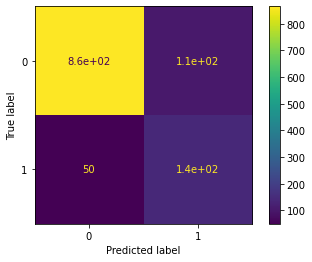

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters = {"n_estimators":list(range(10,300, 50)),"max_features":("sqrt", "log2")}
rfc = RandomForestClassifier()
gd_rfc = GridSearchCV(rfc, parameters)
gd_rfc.fit(xtrain, ytrain)
predictions = gd_rfc.predict(xvalidation)
Accuracy.append(cfmatrix_and_accuracy(predictions, yvalidation, classNames))

### RFC Model Training with the best parameters

In [39]:
rfc = RandomForestClassifier(**gd_rfc.best_params_)
rfc.fit(xtrain, ytrain);

# SVC

In [40]:
from sklearn import svm
parameters = {'kernel' : ('linear', 'poly', 'sigmoid'),'C': [0.1, 1, 10, 100] }
svc = svm.SVC()
gd_svc = GridSearchCV(svc, parameters)
gd_svc.fit(xtrain, ytrain);

          Train
    Accuracy = 0.7975104935591257 


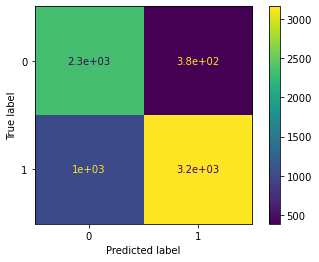

In [41]:
predictions = gd_svc.predict(xtrain)
print("          Train")
cfmatrix_and_accuracy(predictions, ytrain, classNames);

          Validation
    Accuracy = 0.7268041237113402 


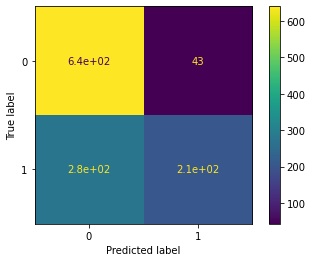

In [42]:
predictions = gd_svc.predict(xvalidation)
print("          Validation")
Accuracy.append(cfmatrix_and_accuracy(predictions, yvalidation, classNames))

### SVC Model Training with the best parameters

In [43]:
svc = svm.SVC(**gd_svc.best_params_)
svc.fit(xtrain, ytrain);

# Model choosing and saving

### We օbserved 6 models 

,Models,Accuracy
0,Decision Tree Classifier,0.817869
1,Decision Tree Regressor,0.835911
2,KNN Classifier,0.846220
3,KNN Regressor,0.845361
4,Random Forest Classifier,0.865979
5,SVC,0.726804


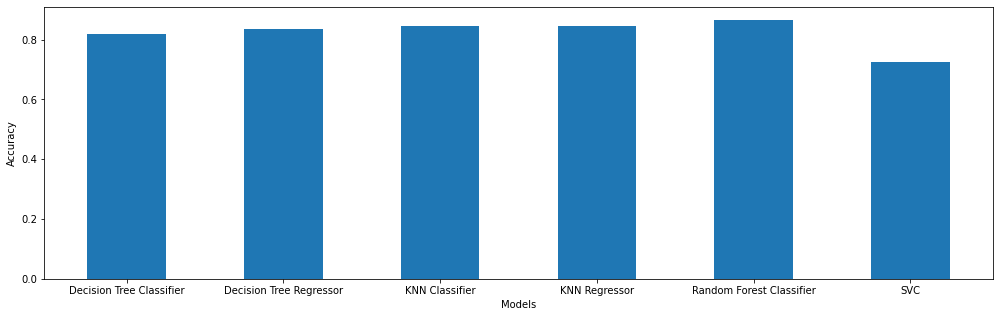

In [47]:
models = pd.DataFrame({"Models":["Decision Tree Classifier", "Decision Tree Regressor","KNN Classifier", 
                                 "KNN Regressor", "Random Forest Classifier", "SVC"], 
"Accuracy":Accuracy})
plt.figure(figsize = (17,5))
plt.bar(models["Models"], models["Accuracy"], width = 0.5);
plt.xlabel("Models")
plt.ylabel("Accuracy");
models

### The best model , which accuracy is maximum , is Random Forest Classification.

In [48]:
# save the model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(rfc, open(filename, 'wb'))

### Load the model from disk and count score

In [49]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.score(xtest, ytest)

0.893353941267388